In [1]:
%cd ..
import numpy as np
import torch

from inpainting.models import BERT
from inpainting.trainer import Trainer
from inpainting.datasets import MNIST

In [2]:
mnist = MNIST(frac=0.1, clusters=299)

In [3]:
model = BERT(
    vocab_size = mnist.tokens,      # BERT's vocabulary size
    embed_size = mnist.tokens,      # Hidden size
    num_layers = 10,                # Number of Transformer layers
    num_heads = 3,                  # Numbertargets of attention heads
    ff_hidden = 5000,               # Feed-forward hidden size
    max_len = 50,                   # Maximum sequence length
    dropout = 0.00
)

The training data generator chooses 15% of the token positions at random for prediction. If the i-th token is chosen, we replace the i-th token with (1) the [MASK] token 80% of the time (2) a random token 10% of the time (3) the unchanged i-th token 10% of the time.

In [ ]:
Trainer(model, mnist).train(epochs=5)

running on device cuda
Epoch: 0         		Loss: 0.9997676014900208
Epoch: 1         		Loss: 1.7543225288391113
Epoch: 2         		Loss: 2.190366506576538
Epoch: 3         		Loss: 2.3279786109924316
Epoch: 4         		Loss: 2.2642040252685547
Epoch: 5         		Loss: 2.1842594146728516
Epoch: 6         		Loss: 2.1764583587646484
Epoch: 7         		Loss: 2.107278347015381
Epoch: 8         		Loss: 1.972509741783142
Epoch: 9         		Loss: 2.2107739448547363
Epoch: 10        		Loss: 2.1517281532287598
Epoch: 11        		Loss: 2.0965027809143066
Epoch: 12        		Loss: 2.0788521766662598
Epoch: 13        		Loss: 2.1657721996307373
Epoch: 14        		Loss: 2.214102268218994
Epoch: 15        		Loss: 2.183020830154419
Epoch: 16        		Loss: 2.13177490234375


KeyboardInterrupt: 

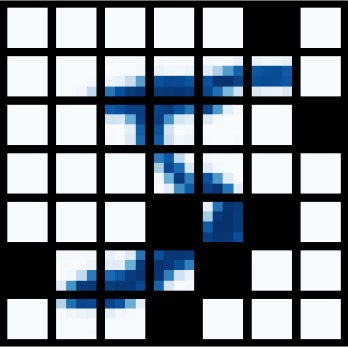

In [5]:
x = mnist[0][0]
mnist.plot_sample(x)

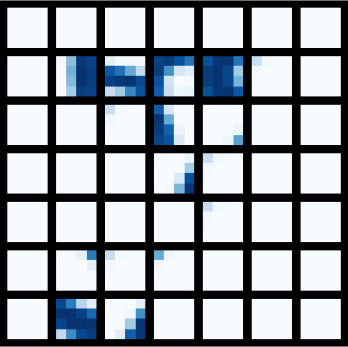

In [6]:
y = model(x.unsqueeze(0).cuda()).argmax(dim=-1).cpu()
mnist.plot_sample(y)